## Name : Parth Arora
## Roll No : 2018IMT-063
## Course: Machine Learning Lab
## Course Code: ITIT-4107-2021
## Deadline: 2 Oct 2021

In [ ]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Generating our dataset
x = np.random.uniform(0, 1, 60)            
noise = np.random.normal(0, 0.032, 60)

y1 = np.sin(1 + np.power(x, 2)) + noise 
y2 = np.sin(1 + np.power(x, 2)) 

x = x.reshape(-1, 1)
y1 = y1.reshape(-1, 1)
y2 = y2.reshape(-1, 1)

x_train, x_test, y1_train, y1_test = train_test_split(x, y1,test_size=0.2)
x_train, x_test, y2_train, y2_test = train_test_split(x, y2,test_size=0.2)

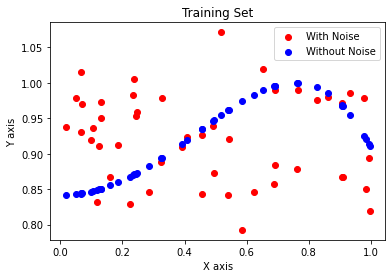

In [ ]:
# Plotting the training set
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title('Training Set')

plt.scatter(x_train, y1_train, label = "With Noise",color = 'red')
plt.scatter(x_train, y2_train, label = "Without Noise",color = 'blue')
plt.legend()
plt.show()

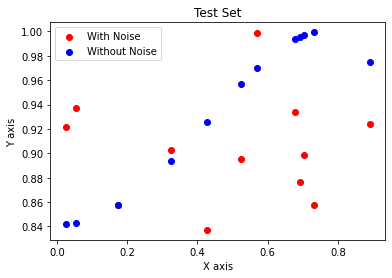

In [ ]:
# Plotting the test set
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title('Test Set')

plt.scatter(x_test, y1_test, label = "With Noise",color = 'red')
plt.scatter(x_test, y2_test, label = "Without Noise",color = 'blue')
plt.legend()
plt.show()

In [ ]:

# Linear Regression using Closed-Form solution
def predict(x, theta):
    return np.dot(x, theta)

def getThetaClosedForm(x, y):
    y = np.mat(y)
    first = np.dot(x.T, x)
    second = np.dot(x.T, y)
    theta = np.linalg.pinv(first) * second
    return theta

In [ ]:

ones = np.ones((x_train.shape[0], 1))
x_ = np.hstack((x_train, ones))

theta = getThetaClosedForm(x_, y2_train)
print(theta)

[[0.14446986]
 [0.84814788]]


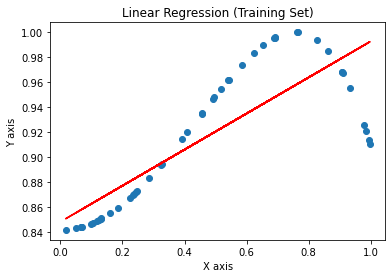

RMSE for training data = 0.03222560451258129


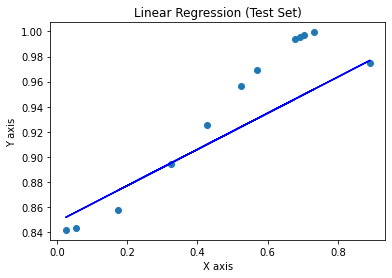

RMSE for test data = 0.03196170058754733


In [ ]:
# Applying LR on training set 
y2_pred_train = predict(x_, theta)

# Calculating the root mean square error for training set
rmse1 = np.sqrt(metrics.mean_squared_error(y2_train, y2_pred_train))

plt.title('Linear Regression (Training Set)')
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.plot(x_train, y2_pred_train, color = 'red')
plt.scatter(x_train, y2_train)
plt.show()

print("RMSE for training set =", rmse1)

# Applying LR on test data 
ones_2 = np.ones((x_test.shape[0], 1))
x_2 = np.hstack((x_test, ones_2))

y2_pred_test = predict(x_2, theta)

# Calculating the root mean square error for test set
rmse2 = np.sqrt(metrics.mean_squared_error(y2_test, y2_pred_test))

plt.title('Linear Regression (Test Set)')
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.plot(x_test, y2_pred_test, color = 'blue')
plt.scatter(x_test, y2_test)
plt.show()

print("RMSE for test set =", rmse2)

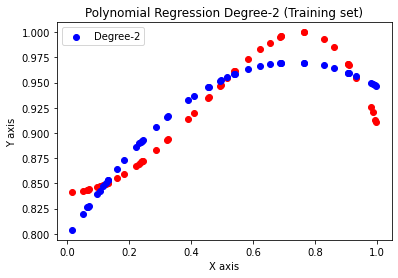

RMSE for training data = 0.019122887731053265


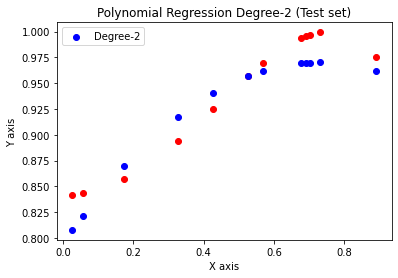

RMSE for test data = 0.021595484696380413


In [ ]:
# Applying Polynomial regression(degree = 2) on training and test set 

poly2 = PolynomialFeatures(degree = 2)
X_poly2 = poly2.fit_transform(x_train)

lin2 = LinearRegression()
lin2.fit(X_poly2, y2_train)

# Training Set
y21_pred = lin2.predict(poly2.fit_transform(x_train));

plt.title('Polynomial Regression Degree-2 (Training set)')
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.scatter(x_train, y2_train,color = 'red')
plt.scatter(x_train, y21_pred, color = 'blue', label = "Degree-2")
plt.legend()
plt.show()

# Calculating the root mean square error for training set
rmsePoly21 = np.sqrt(metrics.mean_squared_error(y2_train, y21_pred))
print("RMSE for training set =", rmsePoly21)

# Test Set
y22_pred = lin2.predict(poly2.fit_transform(x_test));

plt.title('Polynomial Regression Degree-2 (Test set)')
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.scatter(x_test, y2_test,color = 'red')
plt.scatter(x_test, y22_pred, color = 'blue', label = "Degree-2")
plt.legend()
plt.show()

# Calculating the root mean square error for test set
rmsePoly22 = np.sqrt(metrics.mean_squared_error(y2_test, y22_pred))
print("RMSE for test set =", rmsePoly22)

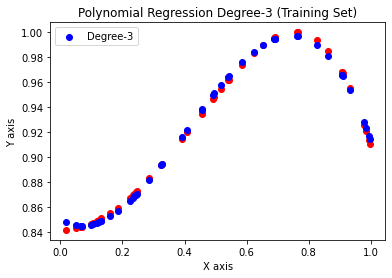

RMSE for training data = 0.0024947664669286063


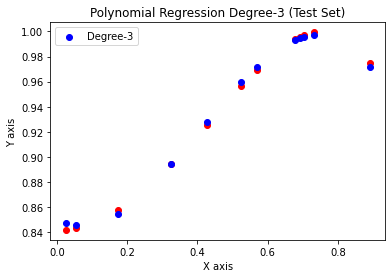

RMSE for test data = 0.0025982451916850557


In [ ]:
# Applying Polynomial regression(degree = 3) on training and test set 
poly3 = PolynomialFeatures(degree = 3)
X_poly3 = poly3.fit_transform(x_train)

lin3 = LinearRegression()
lin3.fit(X_poly3, y2_train)

# Training set
y31_pred = lin3.predict(poly3.fit_transform(x_train));

plt.title('Polynomial Regression Degree-3 (Training Set)')
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.scatter(x_train, y2_train,color = 'red')
plt.scatter(x_train, y31_pred, color = 'blue', label = 'Degree-3')
plt.legend()
plt.show()

# Calculating the root mean square error for training set
rmsePoly31 = np.sqrt(metrics.mean_squared_error(y2_train, y31_pred))
print("RMSE for training set =", rmsePoly31)

# Test set
y32_pred = lin3.predict(poly3.fit_transform(x_test));

plt.title('Polynomial Regression Degree-3 (Test Set)')
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.scatter(x_test, y2_test,color = 'red')
plt.scatter(x_test, y32_pred, color = 'blue', label = 'Degree-3')
plt.legend()
plt.show()

# Calculating the root mean square error for test set
rmsePoly32 = np.sqrt(metrics.mean_squared_error(y2_test, y32_pred))
print("RMSE for test set =", rmsePoly32)

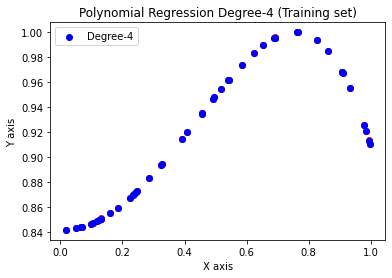

RMSE for training data = 0.0001263749933763009


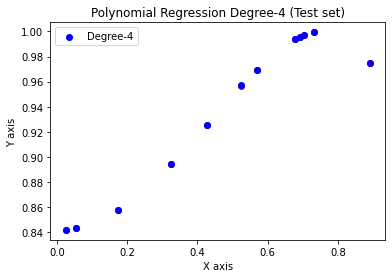

RMSE for test data = 0.00014398135013720108


In [ ]:
# Applying Polynomial regression(degree = 4) on training and test data 
poly4 = PolynomialFeatures(degree = 4)
X_poly4 = poly4.fit_transform(x_train)

lin4 = LinearRegression()
lin4.fit(X_poly4, y2_train)

# Training set
y41_pred = lin4.predict(poly4.fit_transform(x_train));

plt.title('Polynomial Regression Degree-4 (Training set)')
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.scatter(x_train, y2_train,color = 'red')
plt.scatter(x_train, y41_pred, color = 'blue', label = 'Degree-4')
plt.legend()
plt.show()

# Calculating the root mean square error for training set
rmsePoly41 = np.sqrt(metrics.mean_squared_error(y2_train, y41_pred))
print("RMSE for training set =", rmsePoly41)

# Test set
y42_pred = lin4.predict(poly4.fit_transform(x_test));

plt.title('Polynomial Regression Degree-4 (Test set)')
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.scatter(x_test, y2_test,color = 'red')
plt.scatter(x_test, y42_pred, color = 'blue', label = 'Degree-4')
plt.legend()
plt.show()

# Calculating the root mean square error for test set
rmsePoly42 = np.sqrt(metrics.mean_squared_error(y2_test, y42_pred))
print("RMSE for test set =", rmsePoly42)